In [1]:
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/home/davcic/CP_Testing')

args = 1
os.environ['CUDA_VISIBLE_DEVICES'] = f'{args}'
print(f'Selected GPU {args}')

import jax
import jax.random as jrnd
import jax.numpy as jnp
import distrax as dx
import jaxkern as jk

from jax.config import config
config.update("jax_enable_x64", True)  # crucial for Gaussian processes


from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

from uicsmodels.gaussianprocesses.fullgp import FullLatentGPModel, FullMarginalGPModel

Selected GPU 1


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from New_kernel_1 import Discontinuous_multiple
from New_kernel_1 import Discontinuous_multiple_unknown
from New_kernel_1 import Discontinuous_Dirichlet
from New_kernel_1 import Discontinuous_Poisson

# from Poisson_Process_added import Poisson_Process
# from Dirichlet import Dirichlet_Process

# from google.colab import files
plt.style.use('Solarize_Light2')

In [4]:
Color_Dict = {
    "base03":    "#002b36",
    "base02":    "#073642",
    "base01":    "#586e75",
    "base00":    "#657b83",
    "base0":     "#839496",
    "base1":     "#93a1a1",
    "base2":     "#eee8d5",
    "base3":     "#fdf6e3",
    "yellow":    "#b58900",
    "orange":    "#cb4b16",
    "red":       "#dc322f",
    "magenta":   "#d33682",
    "violet":    "#6c71c4",
    "blue":      "#268bd2",
    "cyan":      "#2aa198",
    "green":     "#859900"
}

Data with change points with no underlying change

<ipython-input-5-29fac52d26c4>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, f_true, 'k', label='true f', c = Color_Dict["base01"])
<ipython-input-5-29fac52d26c4>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'rx', label='obs', c = Color_Dict["red"])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

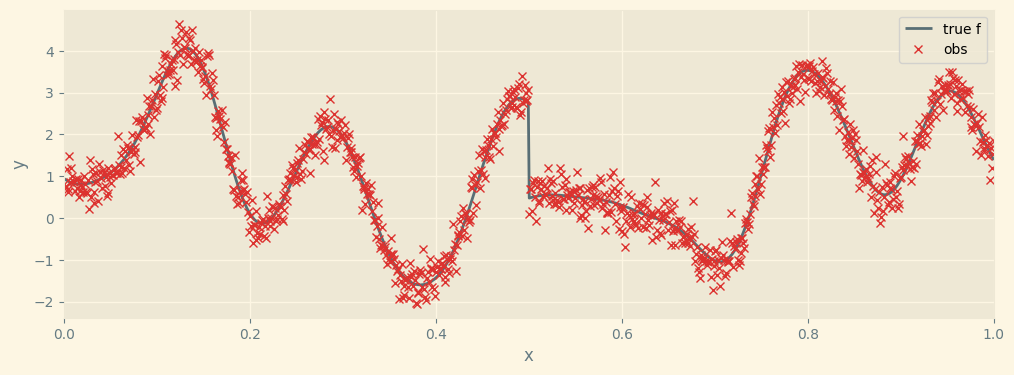

In [5]:
key = jrnd.PRNGKey(1234)

lengthscale_ = 0.05
output_scale_ = 5.0
obs_noise_ = 0.3
n = 1000
x = jnp.linspace(0, 1, n)[:, jnp.newaxis]

x0 = jnp.array([0.5])
base_kernel = jk.RBF()
kernel = Discontinuous_multiple(base_kernel)
K = kernel.cross_covariance(params=dict(lengthscale=lengthscale_,
                                        variance=output_scale_,
                                        CP = x0),
                            x=x, y=x) + 1e-6*jnp.eye(n)

L = jnp.linalg.cholesky(K)
z = jrnd.normal(key, shape=(n,))

f_true = jnp.dot(L, z) + jnp.ones_like(z)
key, obs_key = jrnd.split(key)
y = f_true + obs_noise_*jrnd.normal(obs_key, shape=(n,))

ground_truth = dict(f=f_true,
                    lengthscale=lengthscale_,
                    variance=output_scale_,
                    CP=x0,
                    obs_noise=obs_noise_)

plt.figure(figsize=(12, 4))
plt.plot(x, f_true, 'k', label='true f', c = Color_Dict["base01"])
plt.plot(x, y, 'rx', label='obs', c = Color_Dict["red"])
#plt.plot(jnp.linspace(0, 1*0.7, int(n*0.7)), jnp.zeros(int(n*0.7))-0.1, c = "blue")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0., 1.])
plt.legend()
#plt.savefig("other_data.png")
#files.download("other_data.png")

Get Block covariance matrix

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
xs = [Color_Dict["yellow"],
      Color_Dict["orange"],
      Color_Dict["red"],
      Color_Dict["magenta"],
      Color_Dict["violet"],
      Color_Dict["blue"],
      Color_Dict["cyan"],
      Color_Dict["green"]]
cmap = ListedColormap(list(reversed(xs)))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

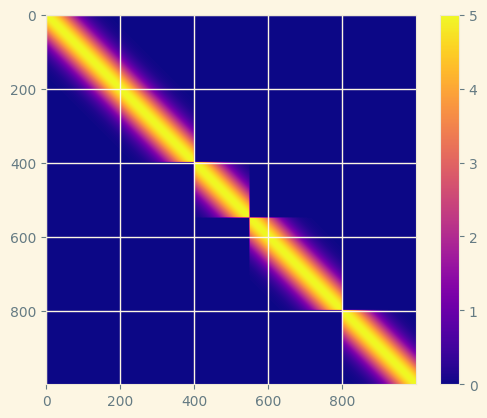

In [ ]:
x0 = jnp.array([0.4, .55, .8])
kernel = Discontinuous_multiple_unknown(base_kernel)
cov = kernel.cross_covariance(params=dict(lengthscale=lengthscale_,
                                        variance=output_scale_,
                                        CP = x0,
                                        num = 3),
                            x=x, y=x)
plt.imshow(cov, cmap = 'plasma')
plt.colorbar()

plt.savefig("block_cov.png")
files.download("block_cov.png")

First GP with known change points

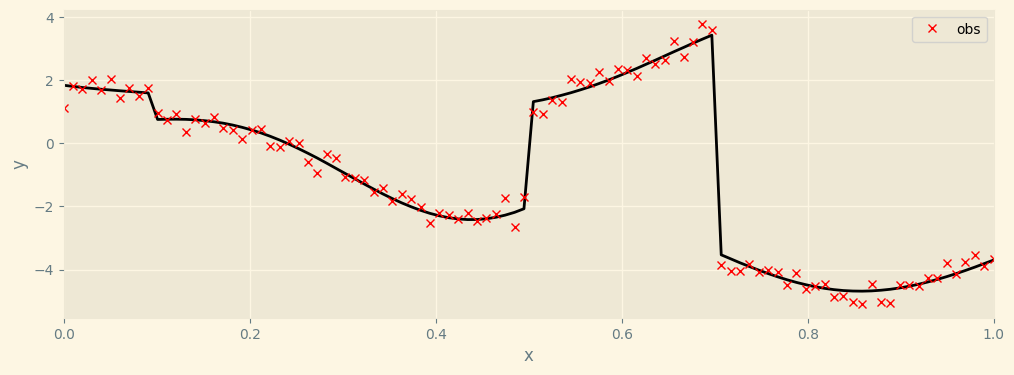

In [6]:
key = jrnd.PRNGKey(12345)

lengthscale_ = 0.2
output_scale_ = 5.0
obs_noise_ = 0.3
n = 100
x = jnp.linspace(0, 1, n)[:, jnp.newaxis]

x0 = jnp.array([10, 50, 70])/n
base_kernel = jk.RBF()
kernel = Discontinuous_multiple(base_kernel)
K = kernel.cross_covariance(params=dict(lengthscale=lengthscale_,
                                        variance=output_scale_,
                                        CP = x0),
                            x=x, y=x) + 1e-6*jnp.eye(n)

L = jnp.linalg.cholesky(K)
z = jrnd.normal(key, shape=(n,))

f_true = jnp.dot(L, z) + jnp.ones_like(z)
key, obs_key = jrnd.split(key)
y = f_true + obs_noise_*jrnd.normal(obs_key, shape=(n,))

ground_truth = dict(f=f_true,
                    lengthscale=lengthscale_,
                    variance=output_scale_,
                    CP=x0,
                    obs_noise=obs_noise_)

plt.figure(figsize=(12, 4))
plt.plot(x, f_true, 'k', label=r'')
plt.plot(x, y, 'rx', label='obs')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0., 1.])
plt.legend();

In [7]:
num_CP = 3
base_kernel = jk.RBF()
kernel = Discontinuous_multiple(base_kernel)

priors = dict(kernel=dict(lengthscale=dx.Transformed(dx.Normal(loc=0.,
                                                               scale=1.),
                                                     tfb.Exp()),
                          variance=dx.Transformed(dx.Normal(loc=0.,
                                                            scale=1.),
                                                  tfb.Exp()),
                          CP=dx.Uniform(low=jnp.zeros(num_CP),
                                        high=jnp.ones(num_CP))
                                                              ),
              likelihood=dict(obs_noise=dx.Transformed(dx.Normal(loc=0.,
                                                                 scale=1.),
                                                       tfb.Exp())))

gp_marginal = FullMarginalGPModel(x, y, cov_fn=kernel, priors=priors)  # Implies likelihood=Gaussian()
gp_latent = FullLatentGPModel(x, y, cov_fn=kernel, priors=priors)  # Defaults to likelihood=Gaussian()

num_particles = 1_000
num_mcmc_steps = 100

In [8]:
%%time

key, gpm_key = jrnd.split(key)
mgp_particles, _, mgp_marginal_likelihood = gp_marginal.inference(gpm_key,
                                                                  mode='gibbs-in-smc',
                                                                  sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))

CPU times: user 43.2 s, sys: 28.9 s, total: 1min 12s
Wall time: 1min 21s


In [9]:
%%time

key, gpl_key = jrnd.split(key)
lgp_particles, _, lgp_marginal_likelihood = gp_latent.inference(gpl_key,
                                                                mode='gibbs-in-smc',
                                                                sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))

CPU times: user 2min 4s, sys: 96 ms, total: 2min 5s
Wall time: 2min 9s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

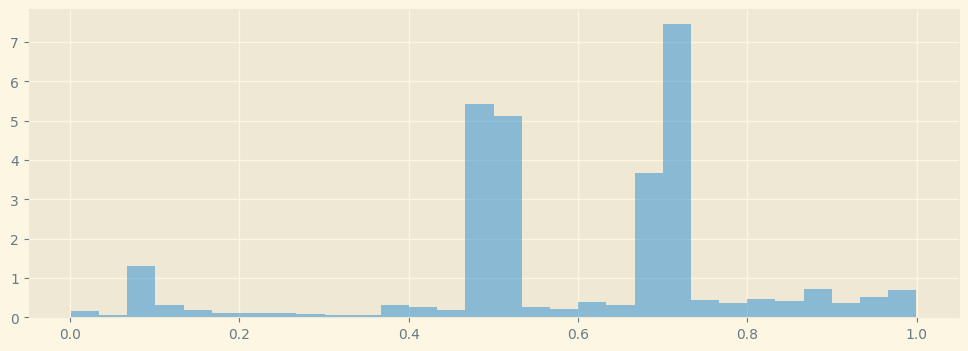

In [ ]:
pd = mgp_particles.particles['kernel']['CP']

new_pd = pd[jnp.logical_not(jnp.isnan(pd))]

fig = plt.figure(figsize = (12, 4))
plt.hist(new_pd, bins=30, density=True, color=Color_Dict["blue"], alpha=0.5)
plt.savefig("ex_post.png")
files.download("ex_post.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

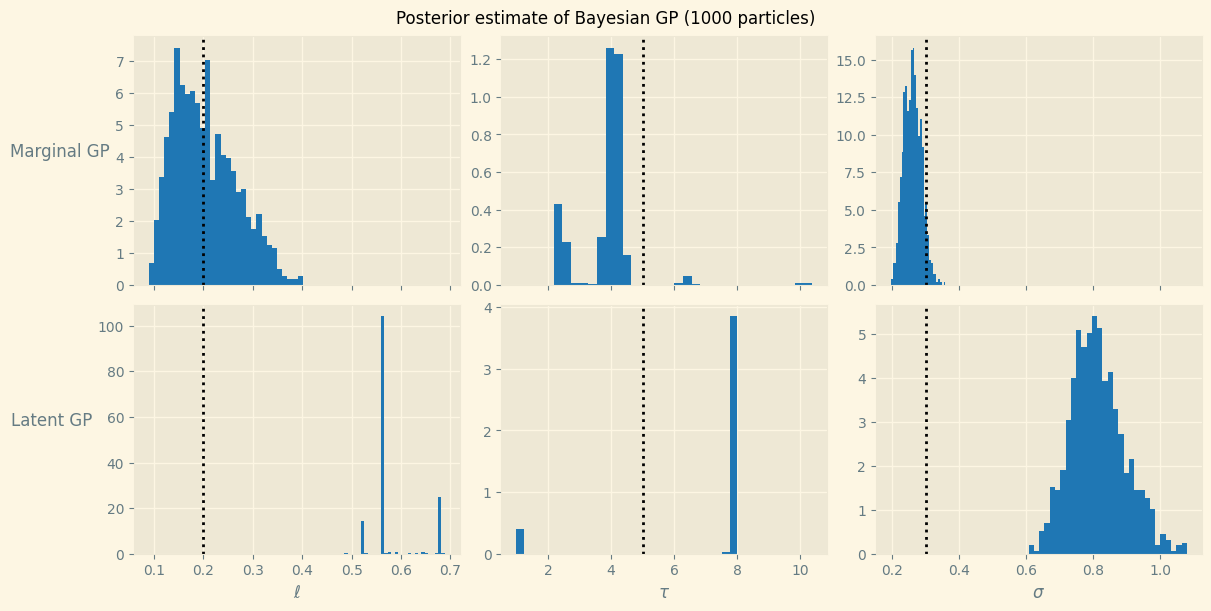

In [13]:
trainables = ['lengthscale', 'variance', 'obs_noise']

num_params = len(trainables)
show_samples = jnp.array([int(i) for i in num_particles*jnp.linspace(0, 1, num=500)])

symbols = dict(lengthscale='\ell',
            obs_noise='\sigma',
            variance=r'\tau')

_, axes = plt.subplots(nrows=2, ncols=num_params, constrained_layout=True,
                    sharex="col", sharey=False, figsize=(12, 6))

for m, particles in enumerate([mgp_particles, lgp_particles]):
    tr = dict(lengthscale=particles.particles['kernel']['lengthscale'],
            variance=particles.particles['kernel']['variance'],
            obs_noise=particles.particles['likelihood']['obs_noise'])
    for j, var in enumerate(trainables):
        ax = axes[m, j]
        pd = tr[var]
        # There are some outliers that skew the axes
        pd_u, pd_l = jnp.percentile(pd, q=99.9), jnp.percentile(pd, q=0.1)
        pd_filtered = jnp.extract(pd>pd_l, pd)
        pd_filtered = jnp.extract(pd_filtered<pd_u, pd_filtered)
        ax.hist(pd, bins=30, density=True, color='tab:blue')
        ax.axvline(x=ground_truth[var], ls=':', c='k')
        if var in symbols and m==1:
            ax.set_xlabel(r'${:s}$'.format(symbols[var]))

plt.suptitle(f'Posterior estimate of Bayesian GP ({num_particles} particles)');

axes[0, 0].set_ylabel('Marginal GP', rotation=0, ha='right')
axes[1, 0].set_ylabel('Latent GP', rotation=0, ha='right')
plt.savefig("parameter_post_easy.png")
files.download("parameter_post_easy.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CPU times: user 10.3 s, sys: 1.51 s, total: 11.8 s
Wall time: 10.3 s


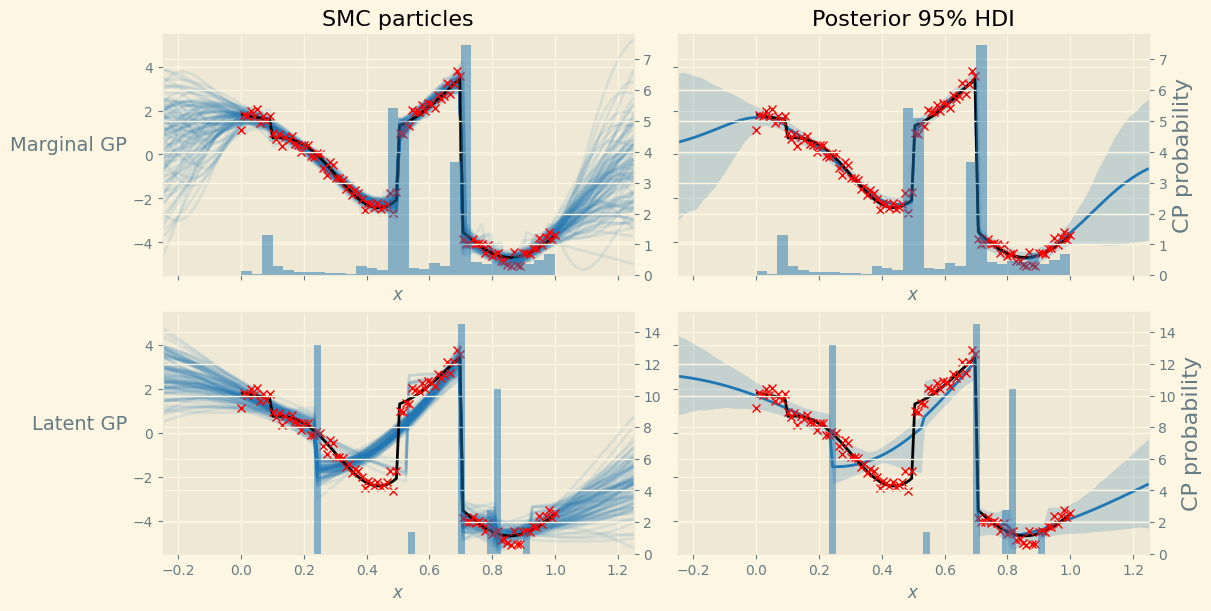

In [14]:
%%time

x_pred = jnp.linspace(-0.25, 1.25, num=150)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex=True,
                            sharey=True, constrained_layout=True)

for j, (gp, particles) in enumerate([[gp_marginal, mgp_particles], [gp_latent, lgp_particles]]):
    key, key_pred = jrnd.split(key)
    f_pred = gp.predict_f(key_pred, x_pred)

    pd = particles.particles['kernel']['CP']
    # There are some outliers that skew the axis
    pd_u, pd_l = jnp.percentile(pd, q=99.9), jnp.percentile(pd, q=0.1)
    pd_filtered = jnp.extract(pd>pd_l, pd)
    pd_filtered = jnp.extract(pd_filtered<pd_u, pd_filtered)

    ax = axes[j, 0]
    for i in jnp.arange(0, num_particles, step=10):
        ax.plot(x_pred, f_pred[i, :], alpha=0.1, color='tab:blue')

    new_pd = pd[jnp.logical_not(jnp.isnan(pd))]
    ax2 = ax.twinx()
    ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)

    ax = axes[j, 1]
    f_mean = jnp.mean(f_pred, axis=0)
    f_hdi_lower = jnp.percentile(f_pred, q=2.5, axis=0)
    f_hdi_upper = jnp.percentile(f_pred, q=97.5, axis=0)

    ax.plot(x_pred, f_mean, color='tab:blue', lw=2)
    ax.fill_between(x_pred, f_hdi_lower, f_hdi_upper,
                    alpha=0.2, color='tab:blue', lw=0)

    #print(new_pd.shape)

    ax2 = ax.twinx()
    ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)
    ax2.set_ylabel('CP probability', fontsize=16)

for ax in axes.flatten():
    ax.plot(x, f_true, 'k', label=r'$f$')
    ax.plot(x, y, 'rx', label='obs')
    ax.set_xlim([-0.25, 1.25])
    ax.set_ylim([-5.5, 5.5])
    ax.set_xlabel(r'$x$', fontsize=12)

axes[0, 0].set_title('SMC particles', fontsize=16)
axes[0, 1].set_title('Posterior 95% HDI', fontsize=16)

axes[0, 0].set_ylabel('Marginal GP', rotation=0, ha='right', fontsize=14)
axes[1, 0].set_ylabel('Latent GP', rotation=0, ha='right', fontsize=14)
plt.savefig("sample_post_easy.png")
files.download("sample_post_easy.png")

GP with unknown amount of fixed points, Poisson/Categorical/Binomial distribution used to estimate correct amount



In [16]:
num_CP = 10
vals = jnp.arange(num_CP)
base_kernel = jk.RBF()
kernel = Discontinuous_multiple_unknown(base_kernel)
p = jnp.zeros(int(num_CP)+1)+(1/(num_CP+1))

priors = dict(kernel=dict(lengthscale=dx.Transformed(dx.Normal(loc=0.,
                                                               scale=1.),
                                                     tfb.Exp()),
                          variance=dx.Transformed(dx.Normal(loc=0.,
                                                            scale=1.),
                                                  tfb.Exp()),
                          CP=dx.Uniform(low=jnp.zeros(int(num_CP)),
                                        high=jnp.ones(int(num_CP))),
                          num=dx.Categorical(probs = p)
                          #lam=dx.Gamma(concentration = , rate = )
                                                              ),
              likelihood=dict(obs_noise=dx.Transformed(dx.Normal(loc=0.,
                                                                 scale=1.),
                                                       tfb.Exp())))

stepsize = 1e-1
gp_marginal = FullMarginalGPModel(x, y, cov_fn=kernel, priors=priors)  # Implies likelihood=Gaussian()
gp_latent = FullLatentGPModel(x, y, cov_fn=kernel, priors=priors)  # Defaults to likelihood=Gaussian()

num_particles = 1_000
num_mcmc_steps = 100

In [17]:
%%time

key, gpm_key = jrnd.split(key)
mgp_particles, _, mgp_marginal_likelihood = gp_marginal.inference(gpm_key,
                                                                  mode='gibbs-in-smc',
                                                                  sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))

CPU times: user 46.5 s, sys: 32.7 s, total: 1min 19s
Wall time: 1min 21s


In [18]:
%%time

key, gpl_key = jrnd.split(key)
lgp_particles, _, lgp_marginal_likelihood = gp_latent.inference(gpl_key,
                                                                mode='gibbs-in-smc',
                                                                sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))

CPU times: user 2min, sys: 109 ms, total: 2min 1s
Wall time: 2min 1s


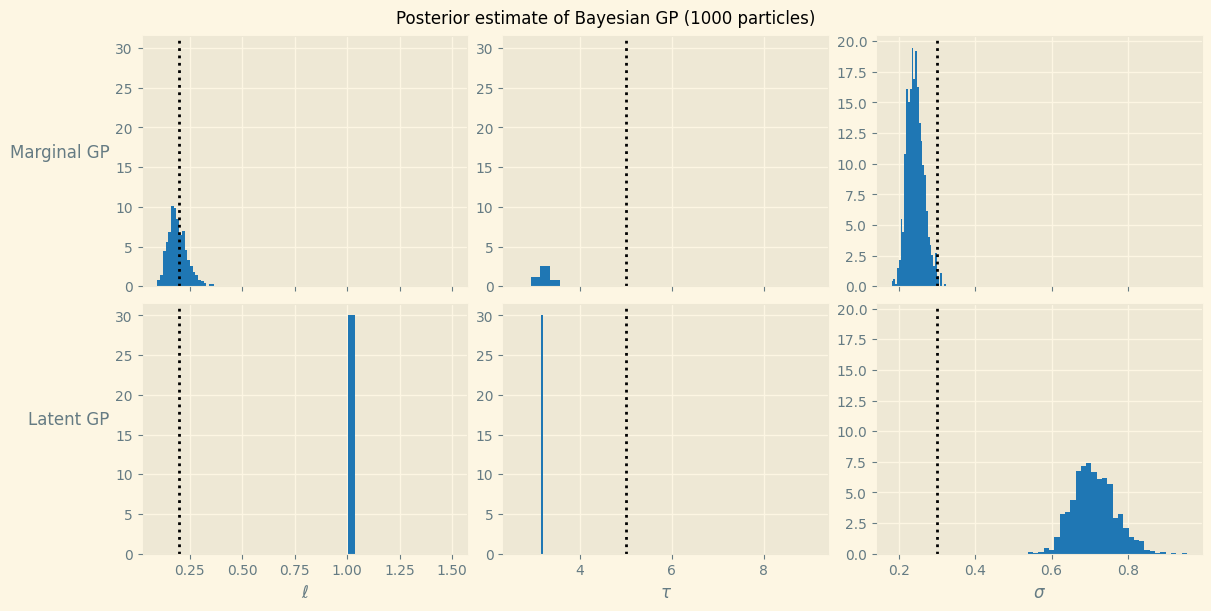

In [19]:
trainables = ['lengthscale', 'variance', 'obs_noise']

num_params = len(trainables)
show_samples = jnp.array([int(i) for i in num_particles*jnp.linspace(0, 1, num=500)])

symbols = dict(lengthscale='\ell',
            obs_noise='\sigma',
            variance=r'\tau')

_, axes = plt.subplots(nrows=2, ncols=num_params, constrained_layout=True,
                    sharex='col', sharey='col', figsize=(12, 6))

for m, particles in enumerate([mgp_particles, lgp_particles]):
    tr = dict(lengthscale=particles.particles['kernel']['lengthscale'],
            variance=particles.particles['kernel']['variance'],
            obs_noise=particles.particles['likelihood']['obs_noise'])
    for j, var in enumerate(trainables):
        ax = axes[m, j]
        pd = tr[var]
        # There are some outliers that skew the axes
        pd_u, pd_l = jnp.percentile(pd, q=99.9), jnp.percentile(pd, q=0.1)
        pd_filtered = jnp.extract(pd>pd_l, pd)
        pd_filtered = jnp.extract(pd_filtered<pd_u, pd_filtered)
        ax.hist(pd, bins=30, density=True, color='tab:blue')
        ax.axvline(x=ground_truth[var], ls=':', c='k')
        if var in symbols and m==1:
            ax.set_xlabel(r'${:s}$'.format(symbols[var]))

plt.suptitle(f'Posterior estimate of Bayesian GP ({num_particles} particles)');

axes[0, 0].set_ylabel('Marginal GP', rotation=0, ha='right')
axes[1, 0].set_ylabel('Latent GP', rotation=0, ha='right');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CPU times: user 15.9 s, sys: 2.97 s, total: 18.8 s
Wall time: 15.9 s


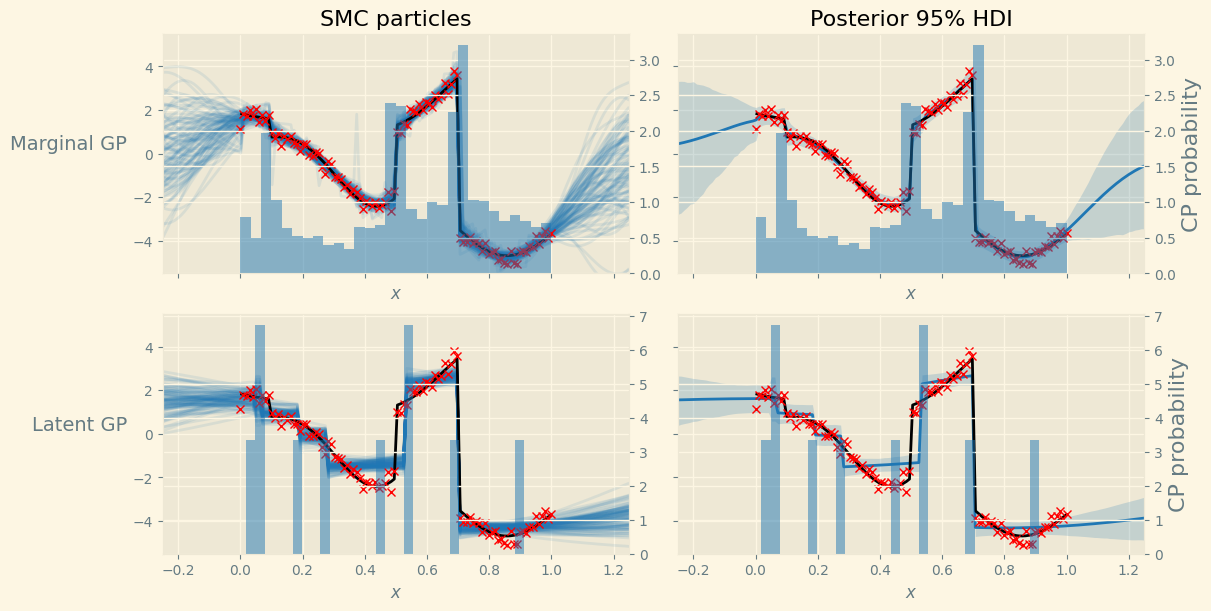

In [31]:
%%time

x_pred = jnp.linspace(-0.25, 1.25, num=150)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex=True,
                            sharey=True, constrained_layout=True)

for j, (gp, particles) in enumerate([[gp_marginal, mgp_particles], [gp_latent, lgp_particles]]):
    key, key_pred = jrnd.split(key)
    f_pred = gp.predict_f(key_pred, x_pred)

    pd = particles.particles['kernel']['CP']
    # There are some outliers that skew the axis
    pd_u, pd_l = jnp.percentile(pd, q=99.9), jnp.percentile(pd, q=0.1)
    pd_filtered = jnp.extract(pd>pd_l, pd)
    pd_filtered = jnp.extract(pd_filtered<pd_u, pd_filtered)

    ax = axes[j, 0]
    for i in jnp.arange(0, num_particles, step=10):
        ax.plot(x_pred, f_pred[i, :], alpha=0.1, color='tab:blue')

    new_pd = pd[jnp.logical_not(jnp.isnan(pd))]
    ax2 = ax.twinx()
    ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)

    ax = axes[j, 1]
    f_mean = jnp.mean(f_pred, axis=0)
    f_hdi_lower = jnp.percentile(f_pred, q=2.5, axis=0)
    f_hdi_upper = jnp.percentile(f_pred, q=97.5, axis=0)

    ax.plot(x_pred, f_mean, color='tab:blue', lw=2)
    ax.fill_between(x_pred, f_hdi_lower, f_hdi_upper,
                    alpha=0.2, color='tab:blue', lw=0)

    #print(new_pd.shape)

    ax2 = ax.twinx()
    ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)
    ax2.set_ylabel('CP probability', fontsize=16)

for ax in axes.flatten():
    ax.plot(x, f_true, 'k', label=r'$f$')
    ax.plot(x, y, 'rx', label='obs')
    ax.set_xlim([-0.25, 1.25])
    ax.set_ylim([-5.5, 5.5])
    ax.set_xlabel(r'$x$', fontsize=12)

axes[0, 0].set_title('SMC particles', fontsize=16)
axes[0, 1].set_title('Posterior 95% HDI', fontsize=16)

axes[0, 0].set_ylabel('Marginal GP', rotation=0, ha='right', fontsize=14)
axes[1, 0].set_ylabel('Latent GP', rotation=0, ha='right', fontsize=14)
plt.savefig("sample_post_unif_cat.png")
files.download("sample_post_unif_cat.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

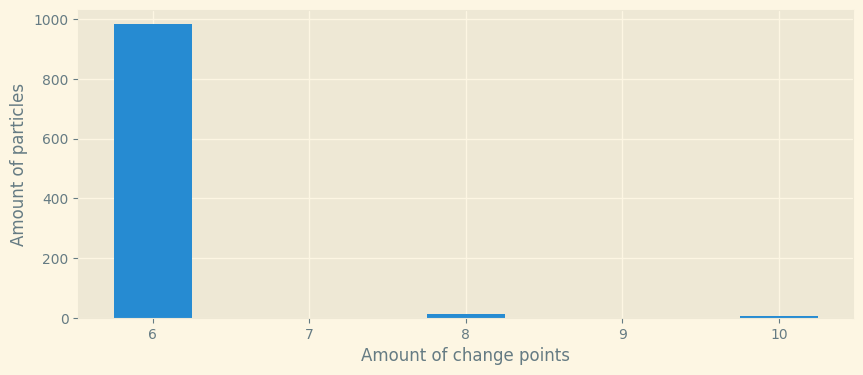

In [47]:
fig = plt.figure(figsize=(10,4))

key, key_pred = jrnd.split(key)

num_val = mgp_particles.particles["kernel"]['num']
uni_vals = jnp.sort(jnp.concatenate([jnp.unique(num_val)-0.5, jnp.unique(num_val)+0.5]))
plt.hist(num_val, bins=uni_vals, align = "mid", rwidth = 0.5)
plt.xlabel("Amount of change points")
plt.ylabel("Amount of particles")
plt.savefig("num_unif_cat.png")
files.download("num_unif_cat.png")

GP with unknown amount of fixed points, Poisson process for locations and amount




In [52]:
scale = 1/3
size = 20
T = 1
base_kernel = jk.RBF()
kernel = Discontinuous_Poisson(base_kernel)
# p = jnp.zeros(num_CP+1)+(1/(num_CP+1))

priors = dict(kernel=dict(lengthscale=dx.Transformed(dx.Normal(loc=0.,
                                                               scale=1.),
                                                     tfb.Exp()),
                          variance=dx.Transformed(dx.Normal(loc=0.,
                                                            scale=1.),
                                                  tfb.Exp()),
                          num=Poisson_Process(scale, size, T)
                                                              ),
              likelihood=dict(obs_noise=dx.Transformed(dx.Normal(loc=0.,
                                                                 scale=1.),
                                                       tfb.Exp())))

gp_marginal = FullMarginalGPModel(x, y, cov_fn=kernel, priors=priors)  # Implies likelihood=Gaussian()
gp_latent = FullLatentGPModel(x, y, cov_fn=kernel, priors=priors)  # Defaults to likelihood=Gaussian()

num_particles = 1_000
num_mcmc_steps = 100

In [53]:
%%time

key, gpm_key = jrnd.split(key)
mgp_particles, _, mgp_marginal_likelihood = gp_marginal.inference(gpm_key,
                                                                  mode='gibbs-in-smc',
                                                                  sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))

CPU times: user 48.9 s, sys: 33.9 s, total: 1min 22s
Wall time: 1min 25s


In [54]:
%%time

key, gpl_key = jrnd.split(key)
lgp_particles, _, lgp_marginal_likelihood = gp_latent.inference(gpl_key,
                                                                mode='gibbs-in-smc',
                                                                sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))

CPU times: user 1min 55s, sys: 94.2 ms, total: 1min 55s
Wall time: 2min 2s


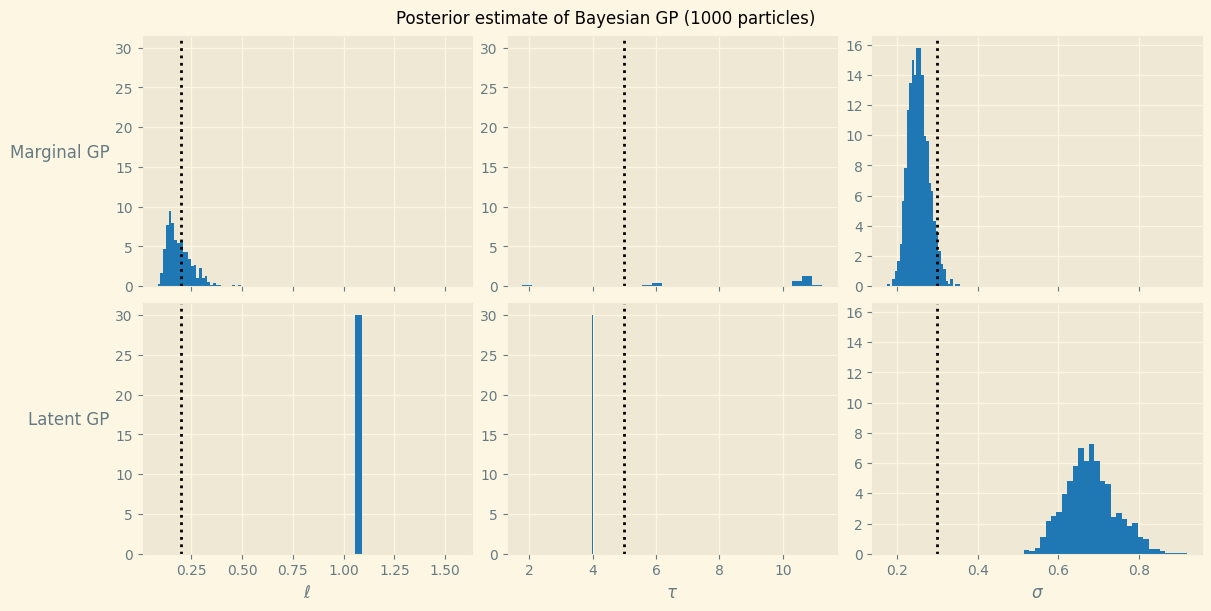

In [55]:
trainables = ['lengthscale', 'variance', 'obs_noise']

num_params = len(trainables)
show_samples = jnp.array([int(i) for i in num_particles*jnp.linspace(0, 1, num=500)])

symbols = dict(lengthscale='\ell',
            obs_noise='\sigma',
            variance=r'\tau')

_, axes = plt.subplots(nrows=2, ncols=num_params, constrained_layout=True,
                    sharex='col', sharey='col', figsize=(12, 6))

for m, particles in enumerate([mgp_particles, lgp_particles]):
    tr = dict(lengthscale=particles.particles['kernel']['lengthscale'],
            variance=particles.particles['kernel']['variance'],
            obs_noise=particles.particles['likelihood']['obs_noise'])
    for j, var in enumerate(trainables):
        ax = axes[m, j]
        pd = tr[var]
        # There are some outliers that skew the axes
        pd_u, pd_l = jnp.percentile(pd, q=99.9), jnp.percentile(pd, q=0.1)
        pd_filtered = jnp.extract(pd>pd_l, pd)
        pd_filtered = jnp.extract(pd_filtered<pd_u, pd_filtered)
        ax.hist(pd, bins=30, density=True, color='tab:blue')
        ax.axvline(x=ground_truth[var], ls=':', c='k')
        if var in symbols and m==1:
            ax.set_xlabel(r'${:s}$'.format(symbols[var]))

plt.suptitle(f'Posterior estimate of Bayesian GP ({num_particles} particles)');

axes[0, 0].set_ylabel('Marginal GP', rotation=0, ha='right')
axes[1, 0].set_ylabel('Latent GP', rotation=0, ha='right');

CPU times: user 11.3 s, sys: 1.81 s, total: 13.1 s
Wall time: 12.5 s


Text(0, 0.5, 'Latent GP')

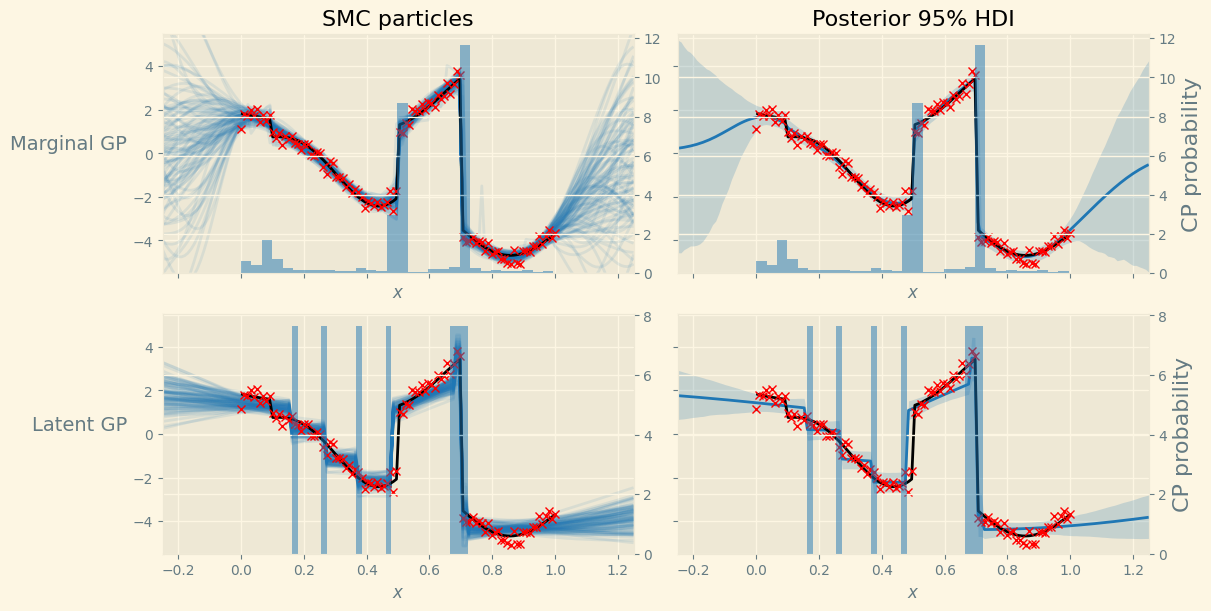

In [56]:
%%time

x_pred = jnp.linspace(-0.25, 1.25, num=150)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex=True,
                            sharey=True, constrained_layout=True)

for j, (gp, particles) in enumerate([[gp_marginal, mgp_particles], [gp_latent, lgp_particles]]):
    key, key_pred = jrnd.split(key)
    f_pred = gp.predict_f(key_pred, x_pred)

    pd = particles.particles['kernel']['num']
    # There are some outliers that skew the axis
    pd_u, pd_l = jnp.percentile(pd, q=99.9), jnp.percentile(pd, q=0.1)
    pd_filtered = jnp.extract(pd>pd_l, pd)
    pd_filtered = jnp.extract(pd_filtered<pd_u, pd_filtered)

    ax = axes[j, 0]
    for i in jnp.arange(0, num_particles, step=10):
        ax.plot(x_pred, f_pred[i, :], alpha=0.1, color='tab:blue')

    new_pd = pd[jnp.logical_not(jnp.isnan(pd))]
    ax2 = ax.twinx()
    ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)

    ax = axes[j, 1]
    f_mean = jnp.mean(f_pred, axis=0)
    f_hdi_lower = jnp.percentile(f_pred, q=2.5, axis=0)
    f_hdi_upper = jnp.percentile(f_pred, q=97.5, axis=0)

    ax.plot(x_pred, f_mean, color='tab:blue', lw=2)
    ax.fill_between(x_pred, f_hdi_lower, f_hdi_upper,
                    alpha=0.2, color='tab:blue', lw=0)

    #print(new_pd.shape)

    ax2 = ax.twinx()
    ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)
    ax2.set_ylabel('CP probability', fontsize=16)

for ax in axes.flatten():
    ax.plot(x, f_true, 'k', label=r'$f$')
    ax.plot(x, y, 'rx', label='obs')
    ax.set_xlim([-0.25, 1.25])
    ax.set_ylim([-5.5, 5.5])
    ax.set_xlabel(r'$x$', fontsize=12)

axes[0, 0].set_title('SMC particles', fontsize=16)
axes[0, 1].set_title('Posterior 95% HDI', fontsize=16)

axes[0, 0].set_ylabel('Marginal GP', rotation=0, ha='right', fontsize=14)
axes[1, 0].set_ylabel('Latent GP', rotation=0, ha='right', fontsize=14);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

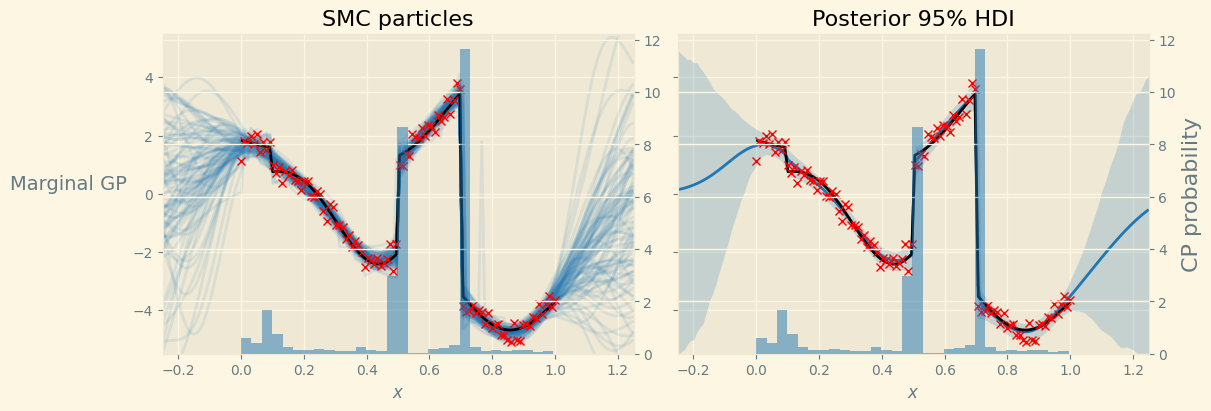

In [70]:
x_pred = jnp.linspace(-0.25, 1.25, num=150)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharex=True,
                            sharey=True, constrained_layout=True)


key, key_pred = jrnd.split(key)
f_pred = gp_marginal.predict_f(key_pred, x_pred)

pd = mgp_particles.particles['kernel']['num']
# There are some outliers that skew the axis
pd_u, pd_l = jnp.percentile(pd, q=99.9), jnp.percentile(pd, q=0.1)
pd_filtered = jnp.extract(pd>pd_l, pd)
pd_filtered = jnp.extract(pd_filtered<pd_u, pd_filtered)

ax = axes[0]
for i in jnp.arange(0, num_particles, step=10):
    ax.plot(x_pred, f_pred[i, :], alpha=0.1, color='tab:blue')

new_pd = pd[jnp.logical_not(jnp.isnan(pd))]
ax2 = ax.twinx()
ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)

ax = axes[1]
f_mean = jnp.mean(f_pred, axis=0)
f_hdi_lower = jnp.percentile(f_pred, q=2.5, axis=0)
f_hdi_upper = jnp.percentile(f_pred, q=97.5, axis=0)

ax.plot(x_pred, f_mean, color='tab:blue', lw=2)
ax.fill_between(x_pred, f_hdi_lower, f_hdi_upper,
                alpha=0.2, color='tab:blue', lw=0)

#print(new_pd.shape)

ax2 = ax.twinx()
ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)
ax2.set_ylabel('CP probability', fontsize=16)

for ax in axes.flatten():
    ax.plot(x, f_true, 'k', label=r'$f$')
    ax.plot(x, y, 'rx', label='obs')
    ax.set_xlim([-0.25, 1.25])
    ax.set_ylim([-5.5, 5.5])
    ax.set_xlabel(r'$x$', fontsize=12)

axes[0].set_title('SMC particles', fontsize=16)
axes[1].set_title('Posterior 95% HDI', fontsize=16)

axes[0].set_ylabel('Marginal GP', rotation=0, ha='right', fontsize=14)

plt.savefig("sample_post_PP.png")
files.download("sample_post_PP.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

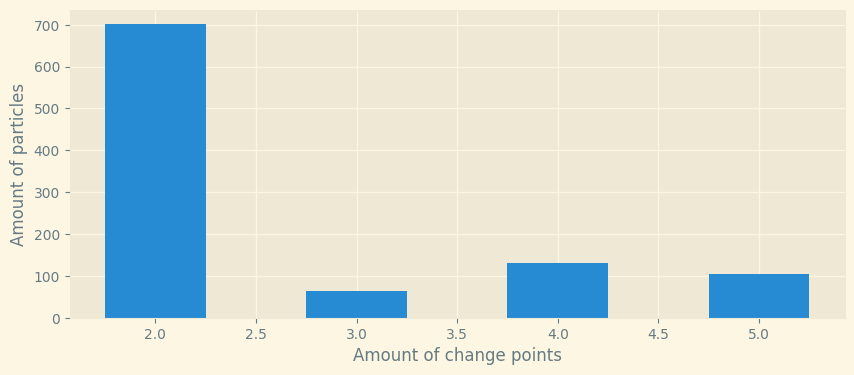

In [69]:
fig = plt.figure(figsize=(10,4))

key, key_pred = jrnd.split(key)

num_val = mgp_particles.particles['kernel']['num']
counts = jnp.count_nonzero(~jnp.isnan(num_val), axis = 1)
uni_vals = jnp.sort(jnp.concatenate([jnp.unique(counts)-0.5, jnp.unique(counts)+0.5]))
plt.hist(counts, bins=uni_vals, rwidth = 0.5)
plt.xlabel("Amount of change points")
plt.ylabel("Amount of particles")
plt.savefig("num_PP.png")
files.download("num_PP.png")

Running multiple runs to see how stable it is

In [71]:
scale = 1/3
size = 10
T = 1
base_kernel = jk.RBF()
kernel = Discontinuous_Poisson(base_kernel)
# p = jnp.zeros(num_CP+1)+(1/(num_CP+1))

priors = dict(kernel=dict(lengthscale=dx.Transformed(dx.Normal(loc=0.,
                                                               scale=1.),
                                                     tfb.Exp()),
                          variance=dx.Transformed(dx.Normal(loc=0.,
                                                            scale=1.),
                                                  tfb.Exp()),
                          num=Poisson_Process(scale, size, T)
                                                              ),
              likelihood=dict(obs_noise=dx.Transformed(dx.Normal(loc=0.,
                                                                 scale=1.),
                                                       tfb.Exp())))

gp_marginal = FullMarginalGPModel(x, y, cov_fn=kernel, priors=priors)  # Implies likelihood=Gaussian()
gp_latent = FullLatentGPModel(x, y, cov_fn=kernel, priors=priors)  # Defaults to likelihood=Gaussian()

num_particles = 1_000
num_mcmc_steps = 100

num_runs = 10

#fig, axes = plt.subplots(nrows = num_runs, 2, figsize=(12, 18))


pd_all = jnp.zeros((num_particles*size, num_runs))
for i in range(num_runs):
  print(i)
  key, gpm_key = jrnd.split(key)
  key, gpm_key = jrnd.split(key)
  mgp_particles, _, mgp_marginal_likelihood = gp_marginal.inference(gpm_key,
                                                                  mode='gibbs-in-smc',
                                                                  sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))

  pd_all = pd_all.at[:, i].set(mgp_particles.particles['kernel']['num'].flatten())

0
1
2
3
4
5
6
7
8
9


In [ ]:
import matplotlib.colors as cm

key = jrnd.PRNGKey(12345)

lengthscale_ = 0.2
output_scale_ = 5.0
obs_noise_ = 0.3
n = 100
x = jnp.linspace(0, 1, n)[:, jnp.newaxis]

x0 = jnp.array([10, 50, 70])/n
base_kernel = jk.RBF()
kernel = Discontinuous_multiple(base_kernel)
K = kernel.cross_covariance(params=dict(lengthscale=lengthscale_,
                                        variance=output_scale_,
                                        CP = x0),
                            x=x, y=x) + 1e-6*jnp.eye(n)

L = jnp.linalg.cholesky(K)
z = jrnd.normal(key, shape=(n,))

f_true = jnp.dot(L, z) + jnp.ones_like(z)
key, obs_key = jrnd.split(key)
y = f_true + obs_noise_*jrnd.normal(obs_key, shape=(n,))

ground_truth = dict(f=f_true,
                    lengthscale=lengthscale_,
                    variance=output_scale_,
                    CP=x0,
                    obs_noise=obs_noise_)

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(x, f_true, 'k', label=r'')
ax1.plot(x, y, 'rx', label='obs')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim([0., 1.])
ax1.legend();

#ax2 = ax1.twinx()
#ax2.hist(pd_all.T, bins=30, density=True, histtype='bar', stacked=True, alpha = 0.5)
#ax2.set_ylabel('CP Probability')
#plt.show()
colors = [cm.to_hex(plt.cm.tab10(i)) for i in range(num_runs)]

ax2 = ax1.twinx()
for i, c in zip(range(num_runs), colors):
  #print(i)
  ax2.hist(pd_all[:, i].T, bins=100, density=True, alpha = 0.3, color = c, label = f'run {i}')
ax2.set_ylabel('CP Probability')
ax2.legend()
plt.savefig("sample_post_PP_10.png")
files.download("sample_post_PP_10.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

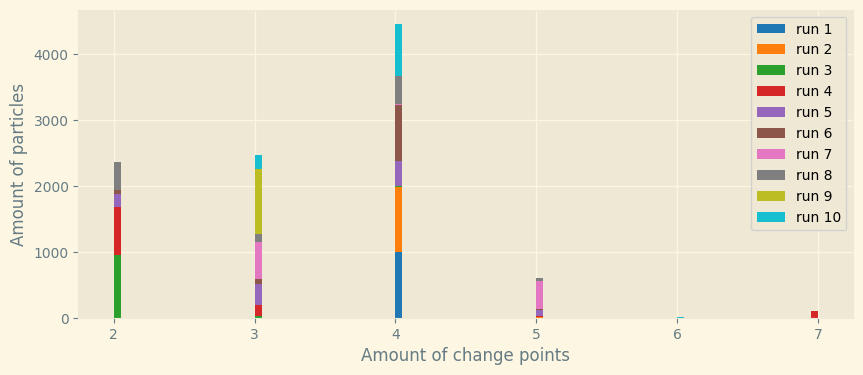

In [93]:
fig = plt.figure(figsize=(10,4))

key, key_pred = jrnd.split(key)

pd_all_new = jnp.reshape(pd_all, (num_particles, size, num_runs))

counts = jnp.zeros((num_particles, num_runs))
for i, c in zip(range(num_runs), colors):
  counts = counts.at[:, i].set(jnp.count_nonzero(~jnp.isnan(pd_all_new[:, :, i]), axis = 1))
  uni_vals = jnp.sort(jnp.concatenate([jnp.unique(counts)-0.5, jnp.unique(counts)+0.5]))

labels = ["run 1", "run 2", "run 3", "run 4", "run 5", "run 6", "run 7", "run 8", "run 9", "run 10"]

plt.hist(counts.T, bins=100, histtype = 'bar', stacked=True, color = colors, label = labels)
plt.xlabel("Amount of change points")
plt.ylabel("Amount of particles")
plt.legend()
plt.savefig("num_PP_10.png")
files.download("num_PP_10.png")

GP with unknown amount of fixed points, Poisson process for locations and amount, scale = 1/10


In [94]:
scale = 1/10
size = 20
T = 1
base_kernel = jk.RBF()
kernel = Discontinuous_Poisson(base_kernel)
# p = jnp.zeros(num_CP+1)+(1/(num_CP+1))

priors = dict(kernel=dict(lengthscale=dx.Transformed(dx.Normal(loc=0.,
                                                               scale=1.),
                                                     tfb.Exp()),
                          variance=dx.Transformed(dx.Normal(loc=0.,
                                                            scale=1.),
                                                  tfb.Exp()),
                          num=Poisson_Process(scale, size, T)
                                                              ),
              likelihood=dict(obs_noise=dx.Transformed(dx.Normal(loc=0.,
                                                                 scale=1.),
                                                       tfb.Exp())))

gp_marginal = FullMarginalGPModel(x, y, cov_fn=kernel, priors=priors)  # Implies likelihood=Gaussian()
gp_latent = FullLatentGPModel(x, y, cov_fn=kernel, priors=priors)  # Defaults to likelihood=Gaussian()

num_particles = 1_000
num_mcmc_steps = 100

In [95]:
%%time

key, gpm_key = jrnd.split(key)
mgp_particles, _, mgp_marginal_likelihood = gp_marginal.inference(gpm_key,
                                                                  mode='gibbs-in-smc',
                                                                  sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))

CPU times: user 45.6 s, sys: 31 s, total: 1min 16s
Wall time: 1min 22s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

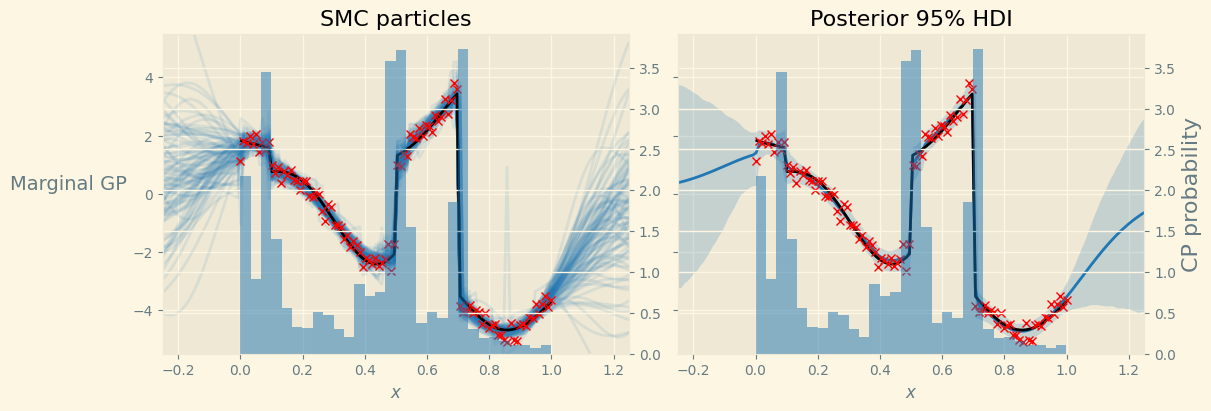

In [96]:
x_pred = jnp.linspace(-0.25, 1.25, num=150)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharex=True,
                            sharey=True, constrained_layout=True)


key, key_pred = jrnd.split(key)
f_pred = gp_marginal.predict_f(key_pred, x_pred)

pd = mgp_particles.particles['kernel']['num']
# There are some outliers that skew the axis
pd_u, pd_l = jnp.percentile(pd, q=99.9), jnp.percentile(pd, q=0.1)
pd_filtered = jnp.extract(pd>pd_l, pd)
pd_filtered = jnp.extract(pd_filtered<pd_u, pd_filtered)

ax = axes[0]
for i in jnp.arange(0, num_particles, step=10):
    ax.plot(x_pred, f_pred[i, :], alpha=0.1, color='tab:blue')

new_pd = pd[jnp.logical_not(jnp.isnan(pd))]
ax2 = ax.twinx()
ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)

ax = axes[1]
f_mean = jnp.mean(f_pred, axis=0)
f_hdi_lower = jnp.percentile(f_pred, q=2.5, axis=0)
f_hdi_upper = jnp.percentile(f_pred, q=97.5, axis=0)

ax.plot(x_pred, f_mean, color='tab:blue', lw=2)
ax.fill_between(x_pred, f_hdi_lower, f_hdi_upper,
                alpha=0.2, color='tab:blue', lw=0)

#print(new_pd.shape)

ax2 = ax.twinx()
ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)
ax2.set_ylabel('CP probability', fontsize=16)

for ax in axes.flatten():
    ax.plot(x, f_true, 'k', label=r'$f$')
    ax.plot(x, y, 'rx', label='obs')
    ax.set_xlim([-0.25, 1.25])
    ax.set_ylim([-5.5, 5.5])
    ax.set_xlabel(r'$x$', fontsize=12)

axes[0].set_title('SMC particles', fontsize=16)
axes[1].set_title('Posterior 95% HDI', fontsize=16)

axes[0].set_ylabel('Marginal GP', rotation=0, ha='right', fontsize=14)

# plt.savefig("sample_post_PP_1_10.png")
# files.download("sample_post_PP_1_10.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

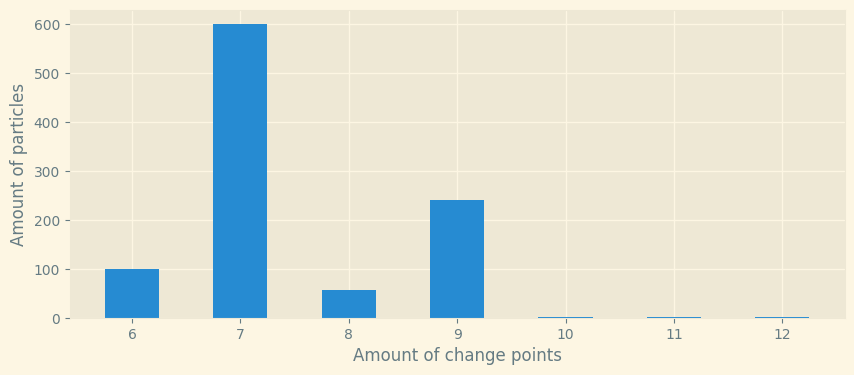

In [97]:
fig = plt.figure(figsize=(10,4))

key, key_pred = jrnd.split(key)

num_val = mgp_particles.particles['kernel']['num']
counts = jnp.count_nonzero(~jnp.isnan(num_val), axis = 1)
uni_vals = jnp.sort(jnp.concatenate([jnp.unique(counts)-0.5, jnp.unique(counts)+0.5]))
plt.hist(counts, bins=uni_vals, rwidth = 0.5)
plt.xlabel("Amount of change points")
plt.ylabel("Amount of particles")
plt.savefig("num_PP_1_10.png")
files.download("num_PP_1_10.png")

Poisson Process

In [16]:
T = 1
def horizon_check(x):
    return jnp.where(x>T, jnp.nan, x)

loc = 1/10

process_length = 100

def _sample_n(key, n: int, process_length, loc):
    """See `Distribution._sample_n`."""
    # out_shape = (n,) + self.batch_shape
    # dtype = jnp.result_type(loc)
    samples = jnp.cumsum(loc*jax.random.exponential(key, [process_length, n]), axis = 0)
    new_samples = jax.vmap(jax.vmap(lambda a: horizon_check(a)))(samples)
    return new_samples.T

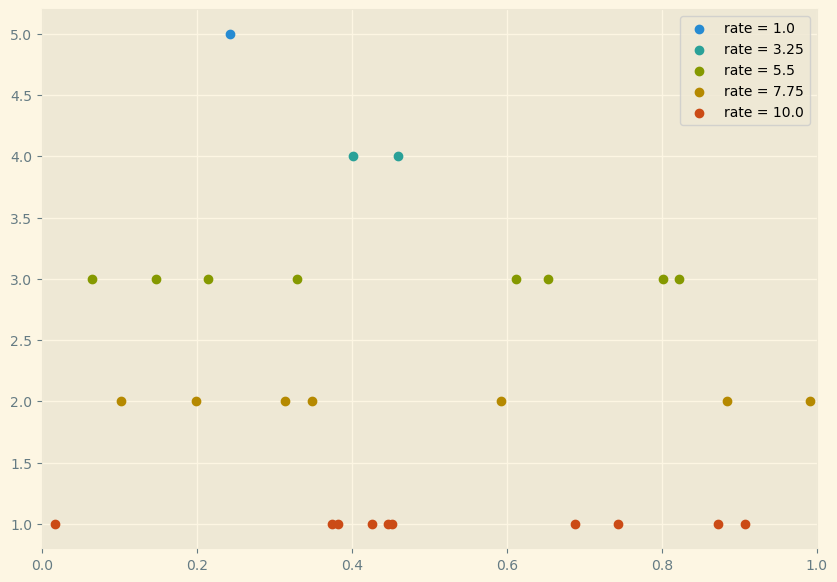

: 

In [18]:
num_runs = 5
key = jrnd.PRNGKey(1234)
locs = jnp.linspace(1, 10, num_runs)
fig = plt.figure(figsize = (10, 7))
for i in range(num_runs):
    loc = 1/locs[i]
    process_length = 10
    key, subkey = jax.random.split(key)
    samples = _sample_n(key, 1, process_length, loc)
    y = jnp.zeros(jnp.count_nonzero(samples))+(num_runs-i)
    # print([jnp.count_nonzero(~jnp.isnan(samples)), jnp.count_nonzero(jnp.isnan(samples))])
    plt.scatter(samples, y, label = f'rate = {locs[i]}')
    plt.legend()
    plt.xlim(0, 1)
plt.show()

(Pseudo)Dirichlet Process samples

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

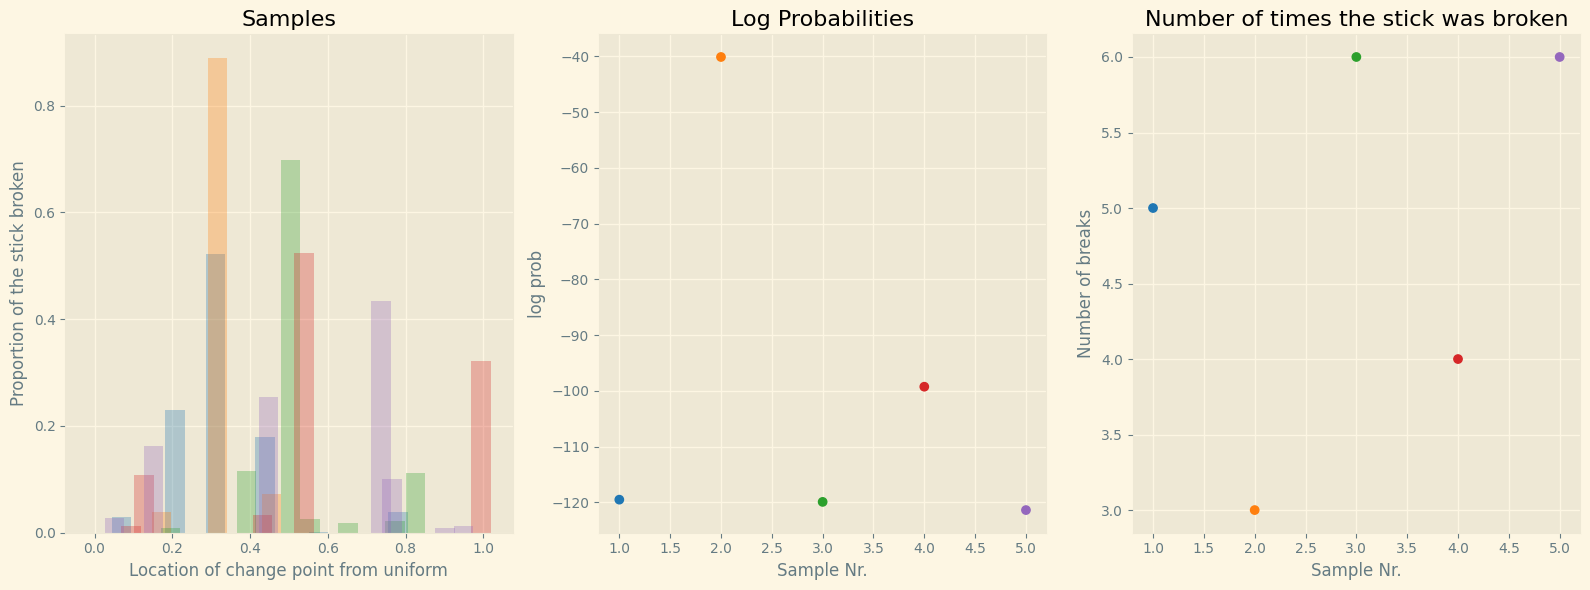

In [103]:
DP = Dirichlet_Process(1, dx.Uniform(), 100)
import matplotlib.colors as cm
num_samples = 5
colors = [cm.to_hex(plt.cm.tab10(i)) for i in range(num_samples)]
key = jrnd.PRNGKey(12345)

key, subkey = jax.random.split(key)
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
carry = DP._sample_n(subkey, num_samples)
pi, v, n, theta, count = carry[:, :, 0], carry[:, :, 1], carry[:, :, 2], carry[:, :, 3], carry[:, :, 4]
prob = jnp.zeros(num_samples)


for i, c in zip(range(num_samples), colors):
    sort_x = jnp.sort(theta[i, :], axis=0)
    indices = jnp.argsort(theta[i, :], axis = 0)
    prob = prob.at[i].set(DP.log_prob(carry[i]))
    ax[0].bar(sort_x, pi[i, indices], 0.05, color = c, alpha = 0.3)

ax[1].scatter(jnp.arange(1, num_samples+1), prob, c=colors)
ax[2].scatter(jnp.arange(1, num_samples+1), count[:, 0], c=colors)

ax[0].set_title("Samples")
ax[1].set_title("Log Probabilities")
ax[2].set_title("Number of times the stick was broken")
ax[0].set_ylabel("Proportion of the stick broken")
ax[1].set_ylabel("log prob")
ax[2].set_ylabel("Number of breaks")
ax[0].set_xlabel("Location of change point from uniform")
ax[1].set_xlabel("Sample Nr.")
ax[2].set_xlabel("Sample Nr.")


plt.tight_layout()
plt.savefig("Dirichlet_samples.png")
files.download("Dirichlet_samples.png")

Learning multiple parameters

In [1]:
import matplotlib.pyplot as plt
import os
import sys
plt.style.use('Solarize_Light2')

sys.path.append('/home/davcic/CP_Testing')

args = 2
os.environ['CUDA_VISIBLE_DEVICES'] = f'{args}'
print(f'Selected GPU {args}')

import jax
import jax.random as jrnd
import jax.numpy as jnp
import distrax as dx
import jaxkern as jk

from jax.config import config
config.update("jax_enable_x64", True)  # crucial for Gaussian processes

from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

from uicsmodels.gaussianprocesses.fullgp import FullLatentGPModel, FullMarginalGPModel

print('Jax version:        ', jax.__version__)
print('Python version:     ', sys.version)
print('Jax default backend:', jax.default_backend())
print('Jax devices:        ', jax.devices())

Selected GPU 2
Jax version:         0.4.16
Python version:      3.10.12 (main, Jul  5 2023, 18:54:27) [GCC 11.2.0]
Jax default backend: gpu
Jax devices:         [gpu(id=0)]


In [5]:
from New_kernel_1 import Discontinuous_multiple
from New_kernel_1 import Discontinuous_multiple_params
from New_kernel_1 import Discontinuous_multiple_params_hyper
from Poisson_Process_added import Poisson_Process_hyper
from fullgp import FullMarginalGPModelhyper_mult
from Uniform_modified import Uniform_mod
from Normal_modified import LogNormal_mod

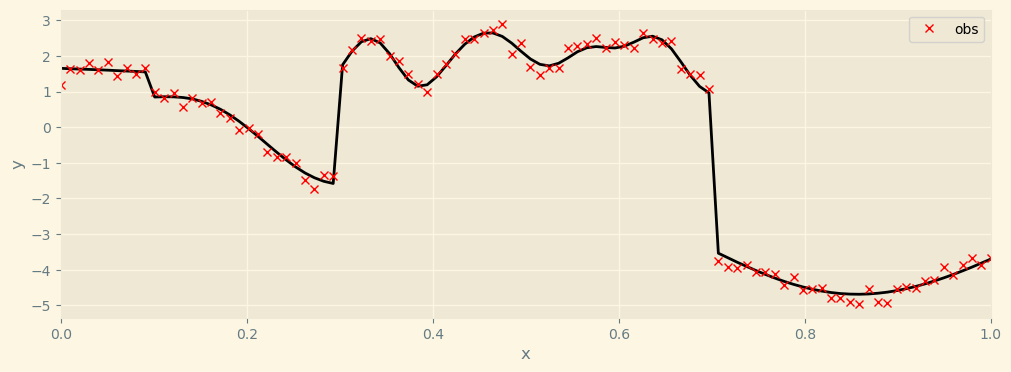

In [6]:
key = jrnd.PRNGKey(12345)

lengthscale_ = jnp.array([0.5, 0.1, 0.04, 0.2])
output_scale_ = jnp.array([3, 2, 1, 5])
obs_noise_ = 0.2
n = 100
x = jnp.linspace(0, 1, n)[:, jnp.newaxis]
x0 = jnp.array([0.3, 0.1, 0.7])
# x0 = jnp.concatenate((jnp.array([0]), x0, jnp.array([x.shape[0]])))
#x0 = jnp.append(jnp.zeros(1), x0, jnp.array(x.shape[0]))
base_kernel = jk.RBF()
kernel = Discontinuous_multiple_params(base_kernel, x0)
K = kernel.cross_covariance(params=dict(lengthscale=lengthscale_,
                                        variance=output_scale_,
                                        num=x0),
                            x=x, y=x)+ 1e-6*jnp.eye(n)

L = jnp.linalg.cholesky(K)
z = jrnd.normal(key, shape=(n,))

f_true = jnp.dot(L, z) + jnp.ones_like(z)
key, obs_key = jrnd.split(key)
y = f_true + obs_noise_*jrnd.normal(obs_key, shape=(n,))

ground_truth = dict(f=f_true,
                    lengthscale=lengthscale_,
                    variance=output_scale_,
                    obs_noise=obs_noise_)

plt.figure(figsize=(12, 4))
plt.plot(x, f_true, 'k', label=r'')
plt.plot(x, y, 'rx', label='obs')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0., 1.])
plt.legend();

In [7]:
size = 10
T = 1
max_CP = size
base_kernel = jk.RBF()
kernel = Discontinuous_multiple_params_hyper(base_kernel)

priors = dict(kernel=dict(
                          lengthscale=LogNormal_mod(0, 1, max_CP),
                          variance=LogNormal_mod(1, 1, max_CP),
                        #   lengthscale=dx.Transformed(dx.MultivariateNormalFullCovariance(jnp.zeros(max_CP),
                        #                                                                  jnp.eye(max_CP)), 
                        #                              dx.Block(tfb.Exp(), 1)),
                        #   variance=dx.Transformed(dx.MultivariateNormalFullCovariance(jnp.zeros(max_CP),
                        #                                                               jnp.eye(max_CP)),
                        #                           dx.Block(tfb.Exp(), 1)),
                          num=Poisson_Process_hyper(size, T)
                                                              ),
              likelihood=dict(obs_noise=dx.Transformed(dx.Normal(loc=0.,
                                                                 scale=1.),
                                                       tfb.Exp())),
              hyper = dict(hyper_pp = dx.Transformed(dx.Normal(loc=0.,
                                                               scale=1.),
                                                     tfb.Exp())))

gp_marginal = FullMarginalGPModelhyper_mult(x, y, cov_fn=kernel, priors=priors)  # Implies likelihood=Gaussian()

num_particles = 1_000
num_mcmc_steps = 100

In [17]:
key, gpm_key = jrnd.split(key)
mgp_particles, _, mgp_marginal_likelihood = gp_marginal.inference(gpm_key,
                                                                mode='gibbs-in-smc',
                                                                sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))


No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01


Text(0, 0.5, 'Marginal GP')

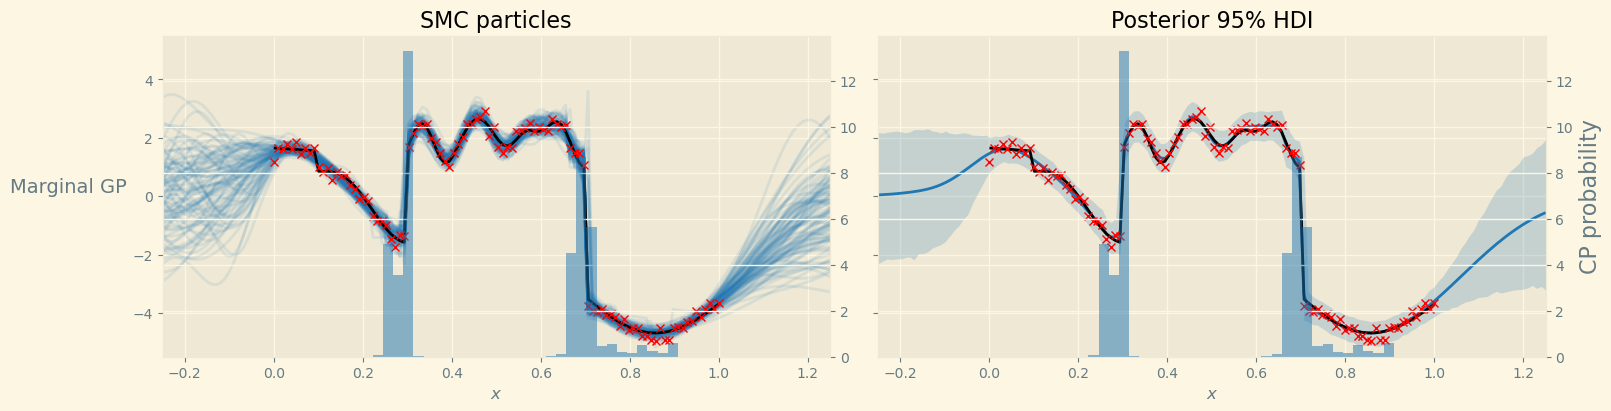

In [18]:
x_pred = jnp.linspace(-0.25, 1.25, num=150)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), sharex=True,
                            sharey=True, constrained_layout=True)


key, key_pred = jrnd.split(key)
f_pred = gp_marginal.predict_f(key_pred, x_pred)

pd = mgp_particles.particles['kernel']['num']
# There are some outliers that skew the axis
# pd_u, pd_l = jnp.percentile(pd, q=99.9), jnp.percentile(pd, q=0.1)
# pd_filtered = jnp.extract(pd>pd_l, pd)
# pd_filtered = jnp.extract(pd_filtered<pd_u, pd_filtered)

ax = axes[0]
for i in jnp.arange(0, num_particles, step=10):
    ax.plot(x_pred, f_pred[i, :], alpha=0.1, color='tab:blue')

new_pd = pd[jnp.logical_not(jnp.isnan(pd))]
ax2 = ax.twinx()
ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)

ax = axes[1]
f_mean = jnp.mean(f_pred, axis=0)
y_pred = gp_marginal.predict_y(key_pred, x_pred)
f_hdi_lower = jnp.percentile(y_pred, q=2.5, axis=0)
f_hdi_upper = jnp.percentile(y_pred, q=97.5, axis=0)
# f_hdi_lower = jnp.percentile(f_pred, q=2.5, axis=0)
# f_hdi_upper = jnp.percentile(f_pred, q=97.5, axis=0)

ax.plot(x_pred, f_mean, color='tab:blue', lw=2)
ax.fill_between(x_pred, f_hdi_lower, f_hdi_upper,
                alpha=0.2, color='tab:blue', lw=0)

#print(new_pd.shape)

ax2 = ax.twinx()
ax2.hist(new_pd, bins=30, density=True, color='tab:blue', alpha=0.5)
ax2.set_ylabel('CP probability', fontsize=16)

for ax in axes.flatten():
    ax.plot(x, f_true, 'k', label=r'$f$')
    ax.plot(x, y, 'rx', label='obs')
    ax.set_xlim([-0.25, 1.25])
    ax.set_ylim([-5.5, 5.5])
    ax.set_xlabel(r'$x$', fontsize=12)

axes[0].set_title('SMC particles', fontsize=16)
axes[1].set_title('Posterior 95% HDI', fontsize=16)

axes[0].set_ylabel('Marginal GP', rotation=0, ha='right', fontsize=14)

In [8]:
num_runs = 10
key_pred, key = jrnd.split(key)

x_pred = jnp.linspace(-0.25, 1.25, num=150)

pd_all = jnp.zeros((num_particles*size, num_runs))
f_pred_all = jnp.zeros((num_particles, 150, num_runs))
for i in range(num_runs):
  print(i)
  key, gpm_key = jrnd.split(key)
  mgp_particles, _, mgp_marginal_likelihood = gp_marginal.inference(gpm_key,
                                                                  mode='gibbs-in-smc',
                                                                  sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps))

  pd_all = pd_all.at[:, i].set(mgp_particles.particles['kernel']['num'].flatten())
  f_pred_all = f_pred_all.at[:, :, i].set(gp_marginal.predict_f(key_pred, x_pred))

0
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
1
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
2
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
3
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
4
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
5
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
6
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
7
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
8
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
9
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01


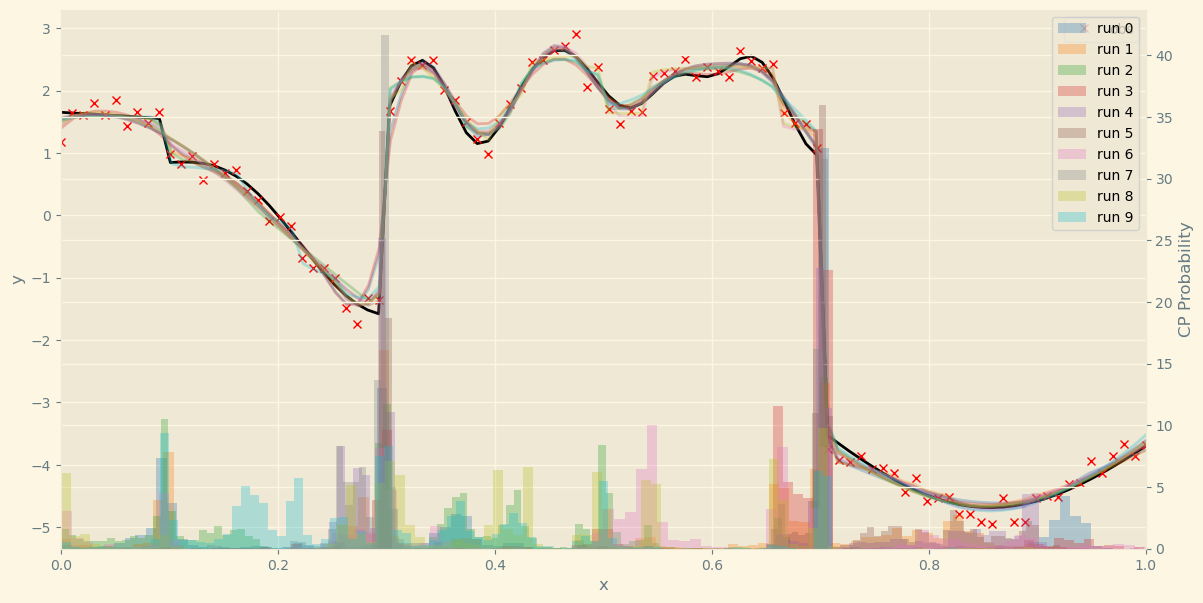

In [10]:
import matplotlib.colors as cm

key = jrnd.PRNGKey(12345)

lengthscale_ = jnp.array([0.5, 0.1, 0.04, 0.2])
output_scale_ = jnp.array([3, 2, 1, 5])
obs_noise_ = 0.2
n = 100
x = jnp.linspace(0, 1, n)[:, jnp.newaxis]
x0 = jnp.array([30, 10, 70])/n
# x0 = jnp.concatenate((jnp.array([0]), x0, jnp.array([x.shape[0]])))
#x0 = jnp.append(jnp.zeros(1), x0, jnp.array(x.shape[0]))
base_kernel = jk.RBF()
kernel = Discontinuous_multiple_params(base_kernel, x0)
K = kernel.cross_covariance(params=dict(lengthscale=lengthscale_,
                                        variance=output_scale_,
                                        num=x0),
                            x=x, y=x)+ 1e-6*jnp.eye(n)

L = jnp.linalg.cholesky(K)
z = jrnd.normal(key, shape=(n,))

f_true = jnp.dot(L, z) + jnp.ones_like(z)
key, obs_key = jrnd.split(key)
y = f_true + obs_noise_*jrnd.normal(obs_key, shape=(n,))

ground_truth = dict(f=f_true,
                    lengthscale=lengthscale_,
                    variance=output_scale_,
                    obs_noise=obs_noise_)

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(x, f_true, 'k', label=r'')
ax1.plot(x, y, 'rx', label='obs')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim([0., 1.])
ax1.legend();

# x_pred = jnp.linspace(-0.25, 1.25, num=150)
# f_pred = gp_marginal.predict_f(key_pred, x_pred)

#ax2 = ax1.twinx()
#ax2.hist(pd_all.T, bins=30, density=True, histtype='bar', stacked=True, alpha = 0.5)
#ax2.set_ylabel('CP Probability')
#plt.show()
colors = [cm.to_hex(plt.cm.tab10(i)) for i in range(num_runs)]


ax2 = ax1.twinx()
for i, c in zip(range(num_runs), colors):
  #print(i)
  f_mean = jnp.mean(f_pred_all[:, :, i], axis=0)
  # f_hdi_lower = jnp.percentile(f_pred[:, :, i], q=2.5, axis=0)
  # f_hdi_upper = jnp.percentile(f_pred[:, :, i], q=97.5, axis=0)

  ax1.plot(x_pred, f_mean, color=c, lw=2, alpha = 0.3)
  # ax1.fill_between(x_pred, f_hdi_lower, f_hdi_upper,
  #                 alpha=0.2, color=c, lw=0)
  ax2.hist(pd_all[:, i].T, bins=100, density=True, alpha = 0.3, color = c, label = f'run {i}')
ax2.set_ylabel('CP Probability')
ax2.legend()
# plt.savefig("sample_post_PP_10_mult_param.png")


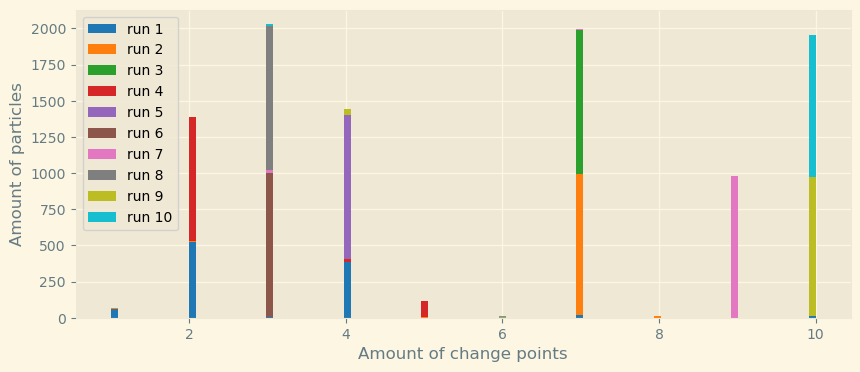

: 

In [11]:
fig = plt.figure(figsize=(10,4))

key, key_pred = jrnd.split(key)

pd_all_new = jnp.reshape(pd_all, (num_particles, size, num_runs))

counts = jnp.zeros((num_particles, num_runs))
for i, c in zip(range(num_runs), colors):
  counts = counts.at[:, i].set(jnp.count_nonzero(~jnp.isnan(pd_all_new[:, :, i]), axis = 1))
  uni_vals = jnp.sort(jnp.concatenate([jnp.unique(counts)-0.5, jnp.unique(counts)+0.5]))

labels = ["run 1", "run 2", "run 3", "run 4", "run 5", "run 6", "run 7", "run 8", "run 9", "run 10"]

plt.hist(counts.T, bins=100, histtype = 'bar', stacked=True, color = colors, label = labels)
plt.xlabel("Amount of change points")
plt.ylabel("Amount of particles")
plt.legend()
# plt.savefig("num_PP_10_mult_param.png")

*Using the Poisson process step*

In [1]:
import matplotlib.pyplot as plt
import os
import sys
plt.style.use('Solarize_Light2')


args = 0
os.environ['CUDA_VISIBLE_DEVICES'] = f'{args}'
print(f'Selected GPU {args}')

import jax
import jax.random as jrnd
import jax.numpy as jnp
import distrax as dx
import jaxkern as jk

from jax.config import config
config.update("jax_enable_x64", True)  # crucial for Gaussian processes

from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

from uicsmodels.gaussianprocesses.fullgp import FullLatentGPModel, FullMarginalGPModel

print('Jax version:        ', jax.__version__)
print('Python version:     ', sys.version)
print('Jax default backend:', jax.default_backend())
print('Jax devices:        ', jax.devices())

Selected GPU 0
Jax version:         0.4.16
Python version:      3.10.12 (main, Jul  5 2023, 18:54:27) [GCC 11.2.0]
Jax default backend: gpu
Jax devices:         [gpu(id=0)]


In [2]:
sys.path.append('/home/davcic/CP_Testing')

from New_kernel_1 import Discontinuous_multiple
from New_kernel_1 import Discontinuous_multiple_params
from New_kernel_1 import Discontinuous_multiple_params_hyper
from Poisson_Process_added import Poisson_Process_hyper
from fullgp import FullMarginalGPModelhyper_mult
from Uniform_modified import Uniform_mod
from Normal_modified import LogNormal_mod
from fullgp import FullLatentGPModelhyper_mult

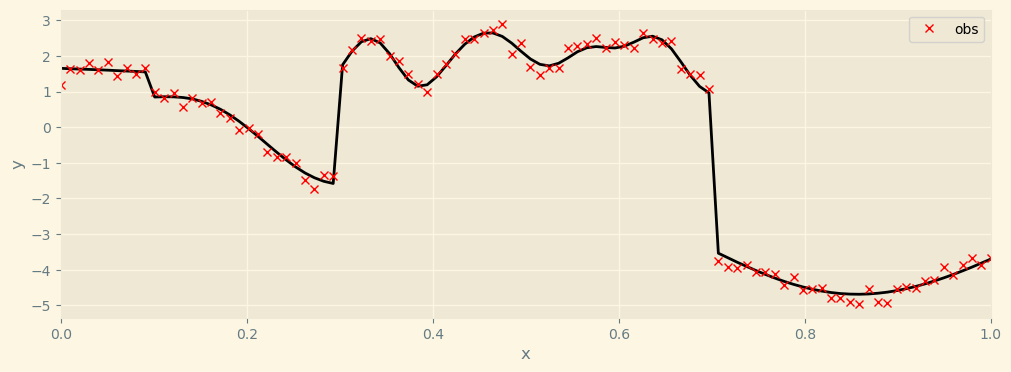

In [3]:
key = jrnd.PRNGKey(12345)

lengthscale_ = jnp.array([0.5, 0.1, 0.04, 0.2])
output_scale_ = jnp.array([3, 2, 1, 5])
obs_noise_ = 0.2
n = 100
x = jnp.linspace(0, 1, n)[:, jnp.newaxis]
x0 = jnp.array([0.3, 0.1, 0.7])
# x0 = jnp.concatenate((jnp.array([0]), x0, jnp.array([x.shape[0]])))
#x0 = jnp.append(jnp.zeros(1), x0, jnp.array(x.shape[0]))
base_kernel = jk.RBF()
kernel = Discontinuous_multiple_params(base_kernel, x0)
K = kernel.cross_covariance(params=dict(lengthscale=lengthscale_,
                                        variance=output_scale_,
                                        num=x0),
                            x=x, y=x)+ 1e-6*jnp.eye(n)

L = jnp.linalg.cholesky(K)
z = jrnd.normal(key, shape=(n,))

f_true = jnp.dot(L, z) + jnp.ones_like(z)
key, obs_key = jrnd.split(key)
y = f_true + obs_noise_*jrnd.normal(obs_key, shape=(n,))

ground_truth = dict(f=f_true,
                    lengthscale=lengthscale_,
                    variance=output_scale_,
                    obs_noise=obs_noise_)

plt.figure(figsize=(12, 4))
plt.plot(x, f_true, 'k', label=r'')
plt.plot(x, y, 'rx', label='obs')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0., 1.])
plt.legend();

In [4]:
size = 10
T = 1
max_CP = size
base_kernel = jk.RBF()
kernel = Discontinuous_multiple_params_hyper(base_kernel)

priors = dict(kernel=dict(
                          # lengthscale=Uniform_mod(low = jnp.zeros(max_CP+1),
                          #                        high = jnp.zeros(max_CP+1)+1),
                          # variance=Uniform_mod(low = jnp.zeros(max_CP+1),
                          #                        high = jnp.zeros(max_CP+1)+5),
                          lengthscale=LogNormal_mod(0, 2, max_CP+1),
                          variance=LogNormal_mod(0.5, 1, max_CP+1), 
                        #   lengthscale=dx.Transformed(dx.MultivariateNormalFullCovariance(jnp.zeros(max_CP),
                        #                                                                  jnp.eye(max_CP)), 
                        #                              dx.Block(tfb.Exp(), 1)),
                        #   variance=dx.Transformed(dx.MultivariateNormalFullCovariance(jnp.zeros(max_CP),
                        #                                                               jnp.eye(max_CP)),
                        #                           dx.Block(tfb.Exp(), 1)),
                          num=Poisson_Process_hyper(size, T)
                                                              ),
              likelihood=dict(obs_noise=dx.Transformed(dx.Normal(loc=0.,
                                                                 scale=1.),
                                                       tfb.Exp())),
              hyper = dict(hyper_pp = dx.Transformed(dx.Normal(loc=0.,
                                                               scale=1.),
                                                     tfb.Exp())))

gp_marginal = FullMarginalGPModelhyper_mult(x, y, cov_fn=kernel, priors=priors)  # Implies likelihood=Gaussian()

num_particles = 1_000
num_mcmc_steps = 100

In [6]:
num_runs = 10
key_pred, key = jrnd.split(key)

x_pred = jnp.linspace(-0.25, 1.25, num=150)

pd_all = jnp.zeros((num_particles*size, num_runs))
f_pred_all = jnp.zeros((num_particles, 150, num_runs))
for i in range(num_runs):
  print(i)
  key, gpm_key = jrnd.split(key)
  mgp_particles, _, mgp_marginal_likelihood = gp_marginal.inference(gpm_key,
                                                                  mode='gibbs-in-smc',
                                                                  sampling_parameters=dict(num_particles=num_particles, num_mcmc_steps=num_mcmc_steps),
                                                                  poisson = True)

  pd_all = pd_all.at[:, i].set(mgp_particles.particles['kernel']['num'].flatten())
  f_pred_all = f_pred_all.at[:, :, i].set(gp_marginal.predict_f(key_pred, x_pred))

0
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
1
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
2
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
3
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
4
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
5
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
6
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
7
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
8
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01
9
No Gibbs kernel available, defaulting to Random Walk Metropolis MCMC, sigma = 0.01


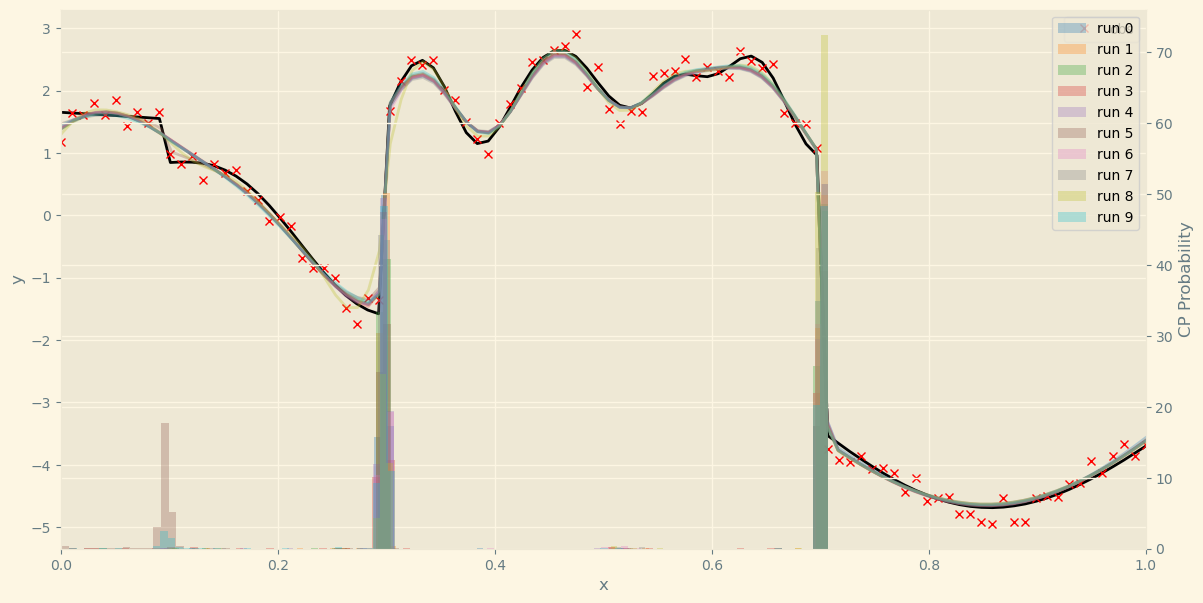

In [7]:
import matplotlib.colors as cm

key = jrnd.PRNGKey(12345)

lengthscale_ = jnp.array([0.5, 0.1, 0.04, 0.2])
output_scale_ = jnp.array([3, 2, 1, 5])
obs_noise_ = 0.2
n = 100
x = jnp.linspace(0, 1, n)[:, jnp.newaxis]
x0 = jnp.array([30, 10, 70])/n
# x0 = jnp.concatenate((jnp.array([0]), x0, jnp.array([x.shape[0]])))
#x0 = jnp.append(jnp.zeros(1), x0, jnp.array(x.shape[0]))
base_kernel = jk.RBF()
kernel = Discontinuous_multiple_params(base_kernel, x0)
K = kernel.cross_covariance(params=dict(lengthscale=lengthscale_,
                                        variance=output_scale_,
                                        num=x0),
                            x=x, y=x)+ 1e-6*jnp.eye(n)

L = jnp.linalg.cholesky(K)
z = jrnd.normal(key, shape=(n,))

f_true = jnp.dot(L, z) + jnp.ones_like(z)
key, obs_key = jrnd.split(key)
y = f_true + obs_noise_*jrnd.normal(obs_key, shape=(n,))

ground_truth = dict(f=f_true,
                    lengthscale=lengthscale_,
                    variance=output_scale_,
                    obs_noise=obs_noise_)

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(x, f_true, 'k', label=r'')
ax1.plot(x, y, 'rx', label='obs')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim([0., 1.])
ax1.legend();

# x_pred = jnp.linspace(-0.25, 1.25, num=150)
# f_pred = gp_marginal.predict_f(key_pred, x_pred)

#ax2 = ax1.twinx()
#ax2.hist(pd_all.T, bins=30, density=True, histtype='bar', stacked=True, alpha = 0.5)
#ax2.set_ylabel('CP Probability')
#plt.show()
colors = [cm.to_hex(plt.cm.tab10(i)) for i in range(num_runs)]


ax2 = ax1.twinx()
for i, c in zip(range(num_runs), colors):
  #print(i)
  f_mean = jnp.mean(f_pred_all[:, :, i], axis=0)
  # f_hdi_lower = jnp.percentile(f_pred[:, :, i], q=2.5, axis=0)
  # f_hdi_upper = jnp.percentile(f_pred[:, :, i], q=97.5, axis=0)

  ax1.plot(x_pred, f_mean, color=c, lw=2, alpha = 0.3)
  # ax1.fill_between(x_pred, f_hdi_lower, f_hdi_upper,
  #                 alpha=0.2, color=c, lw=0)
  ax2.hist(pd_all[:, i].T, bins=100, density=True, alpha = 0.3, color = c, label = f'run {i}')
ax2.set_ylabel('CP Probability')
ax2.legend()
# plt.savefig("sample_post_PP_10_mult_param.png")


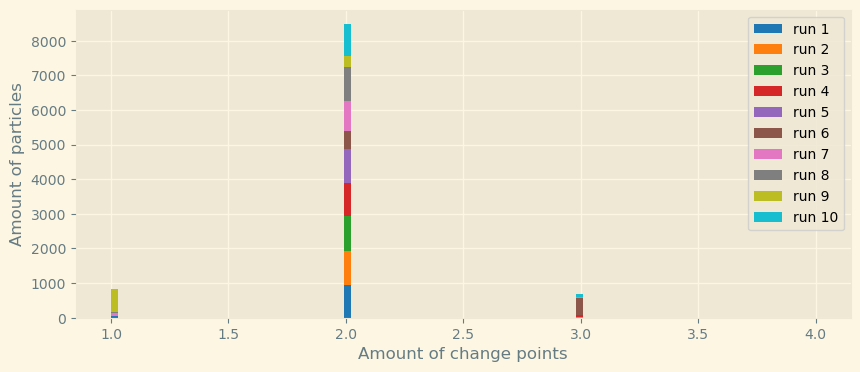

: 

In [8]:
fig = plt.figure(figsize=(10,4))

key, key_pred = jrnd.split(key)

pd_all_new = jnp.reshape(pd_all, (num_particles, size, num_runs))

counts = jnp.zeros((num_particles, num_runs))
for i, c in zip(range(num_runs), colors):
  counts = counts.at[:, i].set(jnp.count_nonzero(~jnp.isnan(pd_all_new[:, :, i]), axis = 1))
  uni_vals = jnp.sort(jnp.concatenate([jnp.unique(counts)-0.5, jnp.unique(counts)+0.5]))

labels = ["run 1", "run 2", "run 3", "run 4", "run 5", "run 6", "run 7", "run 8", "run 9", "run 10"]

plt.hist(counts.T, bins=100, histtype = 'bar', stacked=True, color = colors, label = labels)
plt.xlabel("Amount of change points")
plt.ylabel("Amount of particles")
plt.legend()